# LSFF model 1 validation codes with step by step exploration and comparing 25 draws only

In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

In [2]:
#find filepath for 'count_data' in each country

%cd /share/costeffectiveness/results
%cd vivarium_conic_lsff/
%cd v1.0_disease_only/
%cd nigeria/
%cd 2020_02_26_16_19_00
%cd count_data
!ls -halt

/ihme/costeffectiveness/results
/ihme/costeffectiveness/results/vivarium_conic_lsff
/ihme/costeffectiveness/results/vivarium_conic_lsff/v1.0_disease_only
/ihme/costeffectiveness/results/vivarium_conic_lsff/v1.0_disease_only/nigeria
/ihme/costeffectiveness/results/vivarium_conic_lsff/v1.0_disease_only/nigeria/2020_02_26_16_19_00
/ihme/costeffectiveness/results/vivarium_conic_lsff/v1.0_disease_only/nigeria/2020_02_26_16_19_00/count_data
total 14M
-rw-r--r-- 1 collijk Domain Users  12K Mar 18 19:40 births_with_ntd.csv
drwxr-xr-x 2 collijk Domain Users 9.0K Mar 18 19:40 .
-rw-r--r-- 1 collijk Domain Users 1.1M Mar 18 19:40 births_with_ntd.hdf
-rw-r--r-- 1 collijk Domain Users 9.5K Mar 18 19:40 births.csv
-rw-r--r-- 1 collijk Domain Users 1.1M Mar 18 19:40 births.hdf
-rw-r--r-- 1 collijk Domain Users 620K Mar 18 19:40 transition_count.csv
-rw-r--r-- 1 collijk Domain Users 1.8M Mar 18 19:40 transition_count.hdf
-rw-r--r-- 1 collijk Domain Users 513K Mar 18 19:40 state_person_time.csv
-rw-r--

In [3]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_conic_lsff/v1.0_disease_only/ethiopia/2020_02_26_16_15_59/count_data/',
               '/ihme/costeffectiveness/results/vivarium_conic_lsff/v1.0_disease_only/india/2020_02_26_16_17_48/count_data/',
               '/ihme/costeffectiveness/results/vivarium_conic_lsff/v1.0_disease_only/nigeria/2020_02_26_16_19_00/count_data/']

locations = ['ethiopia','india','nigeria']

# 1) Explore deaths 

In [4]:
#explore deaths.hdf
deaths_explore = pd.read_hdf(output_dirs[1] + 'deaths.hdf')
deaths_explore.head()
#deaths should have 500 rows 25 input_draws, 4 age_groups, 5 causes

# 5000 rows and 8 columns
## years=5, age_group=4, sex=2, cause=5 (200 rows per input_draw), input_draws=25

,year,age_group,sex,cause,measure,input_draw,value
0,2020,1_to_4,female,diarrheal_diseases,death,21,17.0
1,2020,1_to_4,female,diarrheal_diseases,death,29,24.0
2,2020,1_to_4,female,diarrheal_diseases,death,55,17.0
3,2020,1_to_4,female,diarrheal_diseases,death,78,19.0
4,2020,1_to_4,female,diarrheal_diseases,death,155,16.0


In [5]:
deaths_explore['year'].value_counts() 

2021    1000
2022    1000
2020    1000
2024    1000
2023    1000
Name: year, dtype: int64

In [6]:
deaths_explore['age_group'].value_counts() 

late_neonatal     1250
post_neonatal     1250
1_to_4            1250
early_neonatal    1250
Name: age_group, dtype: int64

In [7]:
#explore the categories of column variable 'cause'
deaths_explore['cause'].value_counts() 

lower_respiratory_infections    1000
other_causes                    1000
measles                         1000
diarrheal_diseases              1000
neural_tube_defects             1000
Name: cause, dtype: int64

In [8]:
#explore input_draws
deaths_explore['input_draw'].value_counts() 

307    200
829    200
524    200
620    200
680    200
21     200
29     200
357    200
417    200
533    200
629    200
733    200
78     200
223    200
254    200
394    200
482    200
514    200
602    200
650    200
674    200
946    200
55     200
155    200
232    200
Name: input_draw, dtype: int64

In [9]:
#deaths counts by input_draw, age_group, cause
deaths_explore = (deaths_explore.groupby(['input_draw','age_group','cause'], as_index=False).sum()
          .rename(columns={'value':'deaths'}))
deaths_explore.head()

#500 rows 25 draws x 4 age groups x 5 causes

,input_draw,age_group,cause,deaths
0,21,1_to_4,diarrheal_diseases,284.0
1,21,1_to_4,lower_respiratory_infections,330.0
2,21,1_to_4,measles,71.0
3,21,1_to_4,neural_tube_defects,1.0
4,21,1_to_4,other_causes,1294.0


# 2) Explore person time pt

In [10]:
#explore person time
pt_explore=pd.read_hdf(output_dirs[1] + 'person_time.hdf')
pt_explore.head()


,year,age_group,sex,measure,input_draw,value
0,2020,1_to_4,female,person_time,21,77509.018267
1,2020,1_to_4,female,person_time,29,77410.842881
2,2020,1_to_4,female,person_time,55,77598.582343
3,2020,1_to_4,female,person_time,78,77443.014360
4,2020,1_to_4,female,person_time,155,77465.810373


In [11]:
#person time counts by input_draw, age_group, cause
pt_explore = (pt_explore.groupby(['input_draw','age_group'], as_index=False).sum()
        .rename(columns={'value':'person_time'}))

pt_explore.head(7)

,input_draw,age_group,person_time
0,21,1_to_4,1.379154e+06
1,21,early_neonatal,6.516085e+03
2,21,late_neonatal,1.935524e+04
3,21,post_neonatal,3.081911e+05
4,29,1_to_4,1.380738e+06
5,29,early_neonatal,6.521613e+03
6,29,late_neonatal,1.936053e+04


# 3) Explore person time in a state state_pt

In [12]:
#EXPLORE STATE PERSON TIME 

state_pt_explore = pd.read_hdf(output_dirs[1] + 'state_person_time.hdf')
state_pt_explore.head()

,year,age_group,sex,cause,measure,input_draw,value
0,2020,1_to_4,female,diarrheal_diseases,person_time,21,892.210815
1,2020,1_to_4,female,diarrheal_diseases,person_time,29,1002.406571
2,2020,1_to_4,female,diarrheal_diseases,person_time,55,1030.047912
3,2020,1_to_4,female,diarrheal_diseases,person_time,78,797.694730
4,2020,1_to_4,female,diarrheal_diseases,person_time,155,1042.584531


In [13]:
#explore cause in state_pt
state_pt_explore['cause'].value_counts() 

#no state person times for neural tube defects nor other_causes, no susceptable to measles states 

susceptible_to_diarrheal_diseases              1000
susceptible_to_measles                         1000
lower_respiratory_infections                   1000
susceptible_to_lower_respiratory_infections    1000
measles                                        1000
diarrheal_diseases                             1000
Name: cause, dtype: int64

In [14]:
state_pt_explore['measure'].value_counts() 

person_time    6000
Name: measure, dtype: int64

In [15]:
#state person time by input_draw, age_group, cause (sum over sex)
state_pt_explore = (state_pt_explore.groupby(['input_draw','age_group','cause'], as_index=False).sum()
          .rename(columns={'value':'state_person_time'}))
state_pt_explore.head(7)

#25 input_draws, 4 age_groups, 6 states = 600 rows

,input_draw,age_group,cause,state_person_time
0,21,1_to_4,diarrheal_diseases,1.588531e+04
1,21,1_to_4,lower_respiratory_infections,3.090574e+03
2,21,1_to_4,measles,1.145018e+03
3,21,1_to_4,susceptible_to_diarrheal_diseases,1.362422e+06
4,21,1_to_4,susceptible_to_lower_respiratory_infections,1.375217e+06
5,21,1_to_4,susceptible_to_measles,1.290327e+06
6,21,early_neonatal,diarrheal_diseases,7.404517e+01


In [16]:
#pivot table: explicitly define the columns we care about using the 'values' field.
state_pt_explore = pd.pivot_table(state_pt_explore, index=['input_draw','age_group'], columns='cause',values='state_person_time').reset_index()
state_pt_explore.head()

cause,input_draw,age_group,diarrheal_diseases,lower_respiratory_infections,measles,susceptible_to_diarrheal_diseases,susceptible_to_lower_respiratory_infections,susceptible_to_measles
0,21,1_to_4,15885.308693,3090.573580,1145.018480,1.362422e+06,1.375217e+06,1.290327e+06
1,21,early_neonatal,74.045175,6.439425,0.000000,6.445582e+03,6.513188e+03,6.519628e+03
2,21,late_neonatal,482.354552,52.405202,0.000000,1.886254e+04,1.929248e+04,1.934489e+04
3,21,post_neonatal,7214.636550,991.890486,417.746749,3.007924e+05,3.070152e+05,3.012352e+05
4,29,1_to_4,17537.223819,3991.682409,1486.767967,1.362354e+06,1.375899e+06,1.264354e+06


In [17]:
#testing the renaming thing
#renaming the new columns:
#state_pt_explore = (state_pt_explore.rename(columns={'susceptible_to_diarrheal_diseases':'susceptible_person_time',
#                                           'diarrheal_diseases':'infected_person_time'}))
#state_pt_explore.head()

# 4a) Explore merging death, pt, state_pt

In [18]:
#death + person time
data_explore = deaths_explore.merge(pt_explore, right_on=['input_draw','age_group'], left_on=['input_draw','age_group'])
data_explore.head(10)

#note person_time is the same for all the 5 causes

,input_draw,age_group,cause,deaths,person_time
0,21,1_to_4,diarrheal_diseases,284.0,1.379154e+06
1,21,1_to_4,lower_respiratory_infections,330.0,1.379154e+06
2,21,1_to_4,measles,71.0,1.379154e+06
3,21,1_to_4,neural_tube_defects,1.0,1.379154e+06
4,21,1_to_4,other_causes,1294.0,1.379154e+06
5,21,early_neonatal,diarrheal_diseases,90.0,6.516085e+03
6,21,early_neonatal,lower_respiratory_infections,11.0,6.516085e+03
7,21,early_neonatal,measles,0.0,6.516085e+03
8,21,early_neonatal,neural_tube_defects,5.0,6.516085e+03
9,21,early_neonatal,other_causes,5419.0,6.516085e+03


In [19]:
#merge with person time state

data_explore = data_explore.merge(state_pt_explore, right_on=['input_draw','age_group'],left_on=['input_draw','age_group'])
data_explore.head(10)

,input_draw,age_group,cause,deaths,person_time,diarrheal_diseases,lower_respiratory_infections,measles,susceptible_to_diarrheal_diseases,susceptible_to_lower_respiratory_infections,susceptible_to_measles
0,21,1_to_4,diarrheal_diseases,284.0,1.379154e+06,15885.308693,3090.573580,1145.01848,1.362422e+06,1.375217e+06,1.290327e+06
1,21,1_to_4,lower_respiratory_infections,330.0,1.379154e+06,15885.308693,3090.573580,1145.01848,1.362422e+06,1.375217e+06,1.290327e+06
2,21,1_to_4,measles,71.0,1.379154e+06,15885.308693,3090.573580,1145.01848,1.362422e+06,1.375217e+06,1.290327e+06
3,21,1_to_4,neural_tube_defects,1.0,1.379154e+06,15885.308693,3090.573580,1145.01848,1.362422e+06,1.375217e+06,1.290327e+06
4,21,1_to_4,other_causes,1294.0,1.379154e+06,15885.308693,3090.573580,1145.01848,1.362422e+06,1.375217e+06,1.290327e+06
5,21,early_neonatal,diarrheal_diseases,90.0,6.516085e+03,74.045175,6.439425,0.00000,6.445582e+03,6.513188e+03,6.519628e+03
6,21,early_neonatal,lower_respiratory_infections,11.0,6.516085e+03,74.045175,6.439425,0.00000,6.445582e+03,6.513188e+03,6.519628e+03
7,21,early_neonatal,measles,0.0,6.516085e+03,74.045175,6.439425,0.00000,6.445582e+03,6.513188e+03,6.519628e+03
8,21,early_neonatal,neural_tube_defects,5.0,6.516085e+03,74.045175,6.439425,0.00000,6.445582e+03,6.513188e+03,6.519628e+03
9,21,early_neonatal,other_causes,5419.0,6.516085e+03,74.045175,6.439425,0.00000,6.445582e+03,6.513188e+03,6.519628e+03


# 4b) calculating measures

In [20]:
#CSMR
data_explore['cause_specific_mortality_rate'] = data_explore['deaths'] / data_explore['person_time']

In [21]:
# infected person time ONLY FOR dd, lri, measles ONLY 
# no infected_person_time for 'ntd' and 'other_causes'

#data['excess_mortality_rate'] = data['deaths'] / data['infected_person_time'] 
#data['prevalence'] = data['infected_person_time'] / data['person_time']

# 5) Explore transition data

In [52]:
transition_explore = pd.read_hdf(output_dirs[1] + 'transition_count.hdf')
transition_explore.head()
                        
          

,year,age_group,sex,measure,input_draw,value
0,2020,1_to_4,female,diarrheal_diseases_to_susceptible_to_diarrheal...,21,60988.0
1,2020,1_to_4,female,diarrheal_diseases_to_susceptible_to_diarrheal...,29,60159.0
2,2020,1_to_4,female,diarrheal_diseases_to_susceptible_to_diarrheal...,55,58330.0
3,2020,1_to_4,female,diarrheal_diseases_to_susceptible_to_diarrheal...,78,50774.0
4,2020,1_to_4,female,diarrheal_diseases_to_susceptible_to_diarrheal...,155,65526.0


In [53]:
transition_explore['measure'].value_counts() 

susceptible_to_measles_to_measles_event_count                                              1000
lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count    1000
measles_to_susceptible_to_measles_event_count                                              1000
susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count    1000
susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count                        1000
diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count                        1000
Name: measure, dtype: int64

In [56]:
transition_explore = (transition_explore.groupby(['input_draw','age_group','measure'], as_index=False).sum())      
transition_explore.head()

,input_draw,age_group,measure,value
0,21,1_to_4,diarrheal_diseases_to_susceptible_to_diarrheal...,1088001.0
1,21,1_to_4,lower_respiratory_infections_to_susceptible_to...,122765.0
2,21,1_to_4,measles_to_susceptible_to_measles_event_count,0.0
3,21,1_to_4,susceptible_to_diarrheal_diseases_to_diarrheal...,1084230.0
4,21,1_to_4,susceptible_to_lower_respiratory_infections_to...,122808.0


In [58]:
transition_explore = (pd.pivot_table(transition_explore, index=['input_draw','age_group'], columns='measure',
                                      values='value').reset_index())
transition_explore.head()

measure,input_draw,age_group,diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count,lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count,measles_to_susceptible_to_measles_event_count,susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count,susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count,susceptible_to_measles_to_measles_event_count
0,21,1_to_4,1088001.0,122765.0,0.0,1084230.0,122808.0,41734.0
1,21,early_neonatal,3853.0,217.0,0.0,10540.0,766.0,0.0
2,21,late_neonatal,33394.0,2265.0,0.0,35804.0,2740.0,0.0
3,21,post_neonatal,497765.0,41012.0,0.0,497772.0,41992.0,15480.0
4,29,1_to_4,1045601.0,163823.0,0.0,1043873.0,164515.0,54177.0


# 6a) Run model-output function code for DD, LRI, MEASLES 

In [22]:
#define function for model-ouputs

def get_cause_specific_model_results(cause):
    master_data = pd.DataFrame()
    for i in list(range(len(output_dirs))):
        
    #DEATHS (25 input_draws x 4 age_groups x 5 causes = 500 rows)
        deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf')
        deaths = (deaths.where(deaths['cause'].str.contains(cause)).dropna()
                  .groupby(['input_draw','age_group'], as_index=False).sum() # collapsed over sex
                  .rename(columns={'value':'deaths'})) 
    
    #PERSON_TIME (25 input_draws x 4 age_groups = 100 rows)
        pt = pd.read_hdf(output_dirs[i] + 'person_time.hdf')
        pt = (pt.groupby(['input_draw','age_group'], as_index=False).sum()
              .rename(columns={'value':'person_time'})) 
   
    #STATE_PT    
        state_pt = pd.read_hdf(output_dirs[i] + 'state_person_time.hdf')
       
        #groupings index, age, cause
        state_pt = (state_pt.where(state_pt['cause'].str.contains(cause))
                  .groupby(['input_draw','age_group','cause'], as_index=False).sum())
        state_pt = pd.pivot_table(state_pt, index=['input_draw','age_group'], columns='cause',
                              values='value').reset_index()
        state_pt = (state_pt.rename(columns={f'susceptible_to_{cause}':'susceptible_person_time',
                                           f'{cause}':'infected_person_time'}))
    
    #MERGING deaths + pt + state_pt    
        data = deaths.merge(pt, right_on=['input_draw','age_group'],
                           left_on=['input_draw','age_group'])
        data = data.merge(state_pt, right_on=['input_draw','age_group'],
                             left_on=['input_draw','age_group'])
        
        #calculating measures: csmr, emr, prevalence 
        data['cause_specific_mortality_rate'] = data['deaths'] / data['person_time'] #equation for calcu csmr
        data['excess_mortality_rate'] = data['deaths'] / data['infected_person_time'] #equation for calcu emr
        data['prevalence'] = data['infected_person_time'] / data['person_time'] #equation for calcu prevalence(our 'unique' method)
        
    #CAUSES: diarrheal_diseases, lower_respiratory_infections, measles  
        
        if cause in ['diarrheal_diseases','lower_respiratory_infections','measles']:
            transition = pd.read_hdf(output_dirs[i] + 'transition_count.hdf')
            transition = (transition.where(transition['measure'].str.contains(cause)))
                         
            transition = (transition.groupby(['age_group','measure','input_draw'], as_index=False).sum())      
            transition = (pd.pivot_table(transition, index=['input_draw','age_group'], columns='measure',
                                      values='value').reset_index()
                         .rename(columns={f'{cause}_to_susceptible_to_{cause}_event_count':'remission_count',
                                    f'susceptible_to_{cause}_to_{cause}_event_count':'incident_count'}))
      #MERGING transition data
            data = data.merge(transition, right_on=['age_group','input_draw'],
                             left_on=['age_group','input_draw'])
            data['incidence_rate'] = data['incident_count'] / data['susceptible_person_time']
            data['remission_rate'] = data['remission_count'] / data['infected_person_time']

        data = data.groupby(['age_group'], as_index=False).mean()
        data['location'] = locations[i]
        master_data = master_data.append(data)
    master_data = (master_data.sort_values(by='location')
                     .drop(columns=['input_draw','deaths','person_time',
                                    'infected_person_time',
                                   'susceptible_person_time']))#,
#                                   'incident_count','remission_count']))
    return master_data

In [23]:
#test cause function
test_model = get_cause_specific_model_results('measles')
test_model.head(7)

#other_causes and neural_tube_defects does not have infected_person_time

,age_group,cause_specific_mortality_rate,excess_mortality_rate,prevalence,remission_count,incident_count,incidence_rate,remission_rate,location
0,1_to_4,0.000263,0.421565,0.000639,0.0,34779.96,0.025068,0.0,ethiopia
1,early_neonatal,0.000000,NaN,0.000000,0.0,0.00,0.000000,NaN,ethiopia
2,late_neonatal,0.000000,NaN,0.000000,0.0,0.00,0.000000,NaN,ethiopia
3,post_neonatal,0.000417,0.409193,0.001043,0.0,13932.48,0.039699,0.0,ethiopia
0,1_to_4,0.000088,0.065117,0.001402,0.0,70467.56,0.059498,0.0,india
1,early_neonatal,0.000000,NaN,0.000000,0.0,0.00,0.000000,NaN,india
2,late_neonatal,0.000000,NaN,0.000000,0.0,0.00,0.000000,NaN,india


# 6b) Run model-ouput function code for neural tube defects and other_causes

In [24]:
#model results for NEURAL TUBE DEFECTS and OTHER CAUSES

def get_cause_specific_OTHER_results(cause_other):
    
    master_data_other = pd.DataFrame()
    
    for i in list(range(len(output_dirs))):
        
    #DEATHS 
        deaths_other = pd.read_hdf(output_dirs[i] + 'deaths.hdf')
        deaths_other = (deaths_other.where(deaths_other['cause'].str.contains(cause_other)).dropna()
                  .groupby(['input_draw','age_group'], as_index=False).sum() # collapsed over sex
                  .rename(columns={'value':'deaths'})) 
    
    #PERSON_TIME (25 input_draws x 4 age_groups = 100 rows)
        pt_other = pd.read_hdf(output_dirs[i] + 'person_time.hdf')
        pt_other = (pt_other.groupby(['input_draw','age_group'], as_index=False).sum()
              .rename(columns={'value':'person_time'})) 
   
    #MERGING deaths + pt + state_pt    
        data_other = deaths_other.merge(pt_other, right_on=['input_draw','age_group'],
                           left_on=['input_draw','age_group'])
  
        #calculating measures: csmr 
        data_other['cause_specific_mortality_rate'] = data_other['deaths'] / data_other['person_time'] #equation for csmr
        
        data_other = data_other.groupby(['age_group'], as_index=False).mean()
        data_other['location'] = locations[i]
        
        master_data_other = master_data_other.append(data_other)
    
    master_data_other = (master_data_other.sort_values(by='location')
                     .drop(columns=['input_draw','deaths','person_time']))
                                 
    return master_data_other

In [25]:
get_cause_specific_OTHER_results('neural_tube_defects').head(7)

,age_group,cause_specific_mortality_rate,location
0,1_to_4,4.021636e-05,ethiopia
1,early_neonatal,1.636541e-02,ethiopia
2,late_neonatal,1.212233e-03,ethiopia
3,post_neonatal,2.496316e-04,ethiopia
0,1_to_4,2.901048e-07,india
1,early_neonatal,3.566438e-04,india
2,late_neonatal,4.763402e-05,india


In [26]:
get_cause_specific_OTHER_results('other_causes').head(7)

,age_group,cause_specific_mortality_rate,location
0,1_to_4,0.002021,ethiopia
1,early_neonatal,0.920701,ethiopia
2,late_neonatal,0.071277,ethiopia
3,post_neonatal,0.008772,ethiopia
0,1_to_4,0.000927,india
1,early_neonatal,0.864402,india
2,late_neonatal,0.058413,india


# 7) ARTIFACT data

In [27]:
#find filepath for artifacts

%cd /share/costeffectiveness/artifacts/vivarium_conic_lsff/
!ls -halt

/ihme/costeffectiveness/artifacts/vivarium_conic_lsff
total 1021M
-rw-r--r--  1 alibow  Domain Users         69K Mar 23 10:55 mali.hdf
drwxrwxr-x  3 kjells  Domain Users        2.5K Mar 23 10:55 .
-rw-rw-r--  1 collijk Domain Users        340M Mar 17 10:45 nigeria.hdf
-rw-rw-r--  1 collijk Domain Users        343M Mar 17 10:39 ethiopia.hdf
-rw-rw-r--  1 collijk Domain Users        339M Mar 17 10:39 india.hdf
drwxr-xr-x  2 kjells  Domain Users        1.5K Mar  4 13:53 logs
drwxrwxr-x 26 collijk ihme-cost-eff-micro  12K Feb 13 16:19 ..


In [28]:
#art.keys

# - code save draws from model output to a series

In [30]:
get_draw_numbers = pd.read_hdf(output_dirs[1] + 'deaths.hdf')

draws_in_output = get_draw_numbers.input_draw.unique()
DRAW_COLUMNS_TO_KEEP = [f'draw_{int(i):d}' for i in draws_in_output]
DRAW_COLUMNS_TO_KEEP

['draw_21',
 'draw_29',
 'draw_55',
 'draw_78',
 'draw_155',
 'draw_223',
 'draw_232',
 'draw_254',
 'draw_307',
 'draw_357',
 'draw_394',
 'draw_417',
 'draw_482',
 'draw_514',
 'draw_524',
 'draw_533',
 'draw_602',
 'draw_620',
 'draw_629',
 'draw_650',
 'draw_674',
 'draw_680',
 'draw_733',
 'draw_829',
 'draw_946']

In [31]:
#debugger function to help find the location before collapse over draws

#import pdf; pdb.set_trace()
#https://docs.python.org/3/library/pdb.html

# - artifact loading function

In [32]:
# DEFINE FUNCTION to load data from artifact for a specified cause and measure
# this function is called in the next function below

def load_artifact_data(cause, measure):
    master_art_data = pd.DataFrame()
    for i in ['ethiopia','india','nigeria']:
        art = Artifact('/share/costeffectiveness/artifacts/vivarium_conic_lsff/' + i + '.hdf', 
                   filter_terms=['year_start == 2017', 'age_start < 5'])
        
        data = art.load('cause.' + cause + '.' + measure)
        
        data = data.loc[:, DRAW_COLUMNS_TO_KEEP] #code to keep only the 25 model output draws
        
        data = pd.DataFrame(data.mean(axis=1)).reset_index().rename(columns={0:'value'})
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['age_group'] = 0
        data['age_group'] = np.where(data['age_start'] == 0, 'early_neonatal', 
                                   np.where(data['age_end'] == 1, 'post_neonatal',
                                            np.where(data['age_end'] == 5, '1_to_4', 
                                                    'late_neonatal')))
        master_art_data = master_art_data.append(data)
    return master_art_data

In [33]:
#define function to get artifact data for all locations, causes, measures
## for DD, LRI, measles, NTD


def get_cause_specific_artifact_data(cause):
    master_art = pd.DataFrame()
    
    if cause == 'measles':
        for measure in ['prevalence','incidence_rate','cause_specific_mortality_rate','excess_mortality_rate']:
            data = load_artifact_data(cause, measure)
            master_art = master_art.append(data)
    
    elif cause in 'neural_tube_defects':
        for measure in ['prevalence','cause_specific_mortality_rate','excess_mortality_rate']:
            data = load_artifact_data(cause, measure)
            master_art = master_art.append(data)
    else:
        for measure in ['prevalence','incidence_rate','remission_rate',
                      'cause_specific_mortality_rate','excess_mortality_rate']:
            data = load_artifact_data(cause, measure)
            master_art = master_art.append(data)
    
    master_art = master_art.drop(columns=['age_start','age_end','year_start','year_end'])
    master_art_avg = master_art.groupby(['location','measure','age_group'], as_index=False).mean()
    master_art_avg = pd.pivot_table(master_art_avg, index=['location','age_group'],
                     columns=['measure'], values='value').reset_index()
    master_art_avg = master_art_avg.sort_values(by='location')
   
    return master_art_avg

In [34]:
#test artifact function
test_artifact = get_cause_specific_artifact_data('neural_tube_defects')
test_artifact.head()

measure,location,age_group,cause_specific_mortality_rate,excess_mortality_rate,prevalence
0,Ethiopia,1_to_4,3.719961e-05,0.047336,0.000791
1,Ethiopia,early_neonatal,1.630954e-02,9.925432,0.001643
2,Ethiopia,late_neonatal,1.180175e-03,0.843422,0.001388
3,Ethiopia,post_neonatal,2.193842e-04,0.208049,0.001061
4,India,1_to_4,1.853325e-07,0.000380,0.000491


# 8) Fancy plotting codes

In [35]:
def make_and_save_plots(cause, model_data, artifact_data, title, acronym):
    
    #CSMR
    barWidth = 0.3
    fig,axs = plt.subplots(2,2)
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == 'early_neonatal').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,0].bar(a, gbd, width=barWidth)
    axs[0,0].bar(b, model, width=barWidth)
    axs[0,0].set_title('Early Neonatal')
    
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == 'late_neonatal').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == 'late_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,1].bar(a, gbd, width=barWidth)
    axs[0,1].bar(b, model, width=barWidth)
    axs[0,1].set_title('Late Neonatal')
    
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == 'post_neonatal').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == 'post_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,0].bar(a, gbd, width=barWidth)
    axs[1,0].bar(b, model, width=barWidth)
    axs[1,0].set_title('Post neonatal')
    
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == '1_to_4').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == '1_to_4').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,1].bar(a, gbd, width=barWidth)
    axs[1,1].bar(b, model, width=barWidth)
    axs[1,1].set_title('1 - 5 years old')
    
    plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
             xticklabels=np.unique(model_data['location']))
    for ax in axs.flat:
        ax.set(ylabel='CSMR')
    plt.legend(['Artifact Input','Model Output'])
    plt.suptitle(f'{title} Cause-Specific Mortality Rate',x=0.55, y=1)
    plt.subplots_adjust(right=1.7, top=1.5)
    plt.tight_layout()
    
    #EMR
    barWidth = 0.3
    fig,axs = plt.subplots(2,2)
    model = model_data['excess_mortality_rate'].where(model_data['age_group'] == 'early_neonatal').dropna()
    gbd = artifact_data['excess_mortality_rate'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,0].bar(a, gbd, width=barWidth)
    axs[0,0].bar(b, model, width=barWidth)
    axs[0,0].set_title('Early Neonatal')
    
    model = model_data['excess_mortality_rate'].where(model_data['age_group'] == 'late_neonatal').dropna()
    gbd = artifact_data['excess_mortality_rate'].where(artifact_data['age_group'] == 'late_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,1].bar(a, gbd, width=barWidth)
    axs[0,1].bar(b, model, width=barWidth)
    axs[0,1].set_title('Late neonatal')
    
    model = model_data['excess_mortality_rate'].where(model_data['age_group'] == 'post_neonatal').dropna()
    gbd = artifact_data['excess_mortality_rate'].where(artifact_data['age_group'] == 'post_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,0].bar(a, gbd, width=barWidth)
    axs[1,0].bar(b, model, width=barWidth)
    axs[1,0].set_title('Post neonatal')
    
    model = model_data['excess_mortality_rate'].where(model_data['age_group'] == '1_to_4').dropna()
    gbd = artifact_data['excess_mortality_rate'].where(artifact_data['age_group'] == '1_to_4').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,1].bar(a, gbd, width=barWidth)
    axs[1,1].bar(b, model, width=barWidth)
    axs[1,1].set_title('1 - 5 years old')
    
    plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
             xticklabels=np.unique(model_data['location']))
    for ax in axs.flat:
        ax.set(ylabel='EMR')
    plt.legend(['Artifact Input','Model Output'])
    plt.suptitle(f'{title} Excess Mortality Rate',x=0.55, y=1)
    plt.subplots_adjust(right=1.7, top=1.5)
    plt.tight_layout()
    
    if cause in ['lower_respiratory_infections','diarrheal_diseases','measles','neural_tube_defects']:
        
        # PREVALENCE
        barWidth = 0.3
        fig,axs = plt.subplots(2,2)
        
        model = model_data['prevalence'].where(model_data['age_group'] == 'early_neonatal').dropna()
        gbd = artifact_data['prevalence'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[0,0].bar(a, gbd, width=barWidth)
        axs[0,0].bar(b, model, width=barWidth)
        axs[0,0].set_title('Early Neonatal')
        
        model = model_data['prevalence'].where(model_data['age_group'] == 'late_neonatal').dropna()
        gbd = artifact_data['prevalence'].where(artifact_data['age_group'] == 'late_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[0,1].bar(a, gbd, width=barWidth)
        axs[0,1].bar(b, model, width=barWidth)
        axs[0,1].set_title('Late neonatal')
        
        model = model_data['prevalence'].where(model_data['age_group'] == 'post_neonatal').dropna()
        gbd = artifact_data['prevalence'].where(artifact_data['age_group'] == 'post_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[1,0].bar(a, gbd, width=barWidth)
        axs[1,0].bar(b, model, width=barWidth)
        axs[1,0].set_title('Post neonatal')
        
        model = model_data['prevalence'].where(model_data['age_group'] == '1_to_4').dropna()
        gbd = artifact_data['prevalence'].where(artifact_data['age_group'] == '1_to_4').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[1,1].bar(a, gbd, width=barWidth)
        axs[1,1].bar(b, model, width=barWidth)
        axs[1,1].set_title('1 5 years old')
        
        plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
                 xticklabels=np.unique(model_data['location']))
        for ax in axs.flat:
            ax.set(ylabel='Proportion')
        plt.legend(['Artifact Input','Model Output'])
        plt.suptitle(f'{title} Prevalence',x=0.55, y=1)
        plt.subplots_adjust(right=1.7, top=1.5)
        plt.tight_layout()
       
    if cause in ['lower_respiratory_infections','diarrheal_diseases','measles']:
        
        # INCIDENCE
        barWidth = 0.3
        fig,axs = plt.subplots(2,2)
        
        model = model_data['incidence_rate'].where(model_data['age_group'] == 'early_neonatal').dropna()
        gbd = artifact_data['incidence_rate'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[0,0].bar(a, gbd, width=barWidth)
        axs[0,0].bar(b, model, width=barWidth)
        axs[0,0].set_title('Early Neonatal')
        
        model = model_data['incidence_rate'].where(model_data['age_group'] == 'late_neonatal').dropna()
        gbd = artifact_data['incidence_rate'].where(artifact_data['age_group'] == 'late_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[0,1].bar(a, gbd, width=barWidth)
        axs[0,1].bar(b, model, width=barWidth)
        axs[0,1].set_title('late neonatal')
        
        model = model_data['incidence_rate'].where(model_data['age_group'] == 'post_neonatal').dropna()
        gbd = artifact_data['incidence_rate'].where(artifact_data['age_group'] == 'post_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[1,0].bar(a, gbd, width=barWidth)
        axs[1,0].bar(b, model, width=barWidth)
        axs[1,0].set_title('post neonatal')
        
        model = model_data['incidence_rate'].where(model_data['age_group'] == '1_to_4').dropna()
        gbd = artifact_data['incidence_rate'].where(artifact_data['age_group'] == '1_to_4').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[1,1].bar(a, gbd, width=barWidth)
        axs[1,1].bar(b, model, width=barWidth)
        axs[1,1].set_title('1 - 5 years old')
        
        plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
                 xticklabels=np.unique(model_data['location']))
        for ax in axs.flat:
            ax.set(ylabel='Incidence Rate')
        plt.legend(['Artifact Input','Model Output'])
        plt.suptitle(f'{title} Incidence Rate',x=0.55, y=1)
        plt.subplots_adjust(right=1.7, top=1.5)
        plt.tight_layout()
        
        # REMISSION
        barWidth = 0.3
        fig,axs = plt.subplots(2,2)
        model = model_data['remission_rate'].where(model_data['age_group'] == 'early_neonatal').dropna()
        gbd = artifact_data['remission_rate'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[0,0].bar(a, gbd, width=barWidth)
        axs[0,0].bar(b, model, width=barWidth)
        axs[0,0].set_title('Early Neonatal')
        
        model = model_data['remission_rate'].where(model_data['age_group'] == 'late_neonatal').dropna()
        gbd = artifact_data['remission_rate'].where(artifact_data['age_group'] == 'late_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[0,1].bar(a, gbd, width=barWidth)
        axs[0,1].bar(b, model, width=barWidth)
        axs[0,1].set_title('late Neonatal')
        
        model = model_data['remission_rate'].where(model_data['age_group'] == 'post_neonatal').dropna()
        gbd = artifact_data['remission_rate'].where(artifact_data['age_group'] == 'post_neonatal').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[1,0].bar(a, gbd, width=barWidth)
        axs[1,0].bar(b, model, width=barWidth)
        axs[1,0].set_title('post neonatal')
        
        model = model_data['remission_rate'].where(model_data['age_group'] == '1_to_4').dropna()
        gbd = artifact_data['remission_rate'].where(artifact_data['age_group'] == '1_to_4').dropna()
        a = np.arange(len(model))
        b = [x + barWidth for x in a]
        axs[1,1].bar(a, gbd, width=barWidth)
        axs[1,1].bar(b, model, width=barWidth)
        axs[1,1].set_title('1 - 5 years old')
        
        # Overall Format
        plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
                 xticklabels=np.unique(model_data['location']))
        for ax in axs.flat:
            ax.set(ylabel='Remission Rate')
        plt.legend(['Artifact Input','Model Output'])
        plt.suptitle(f'{title} Remission Rate',x=0.55, y=1)
        plt.subplots_adjust(right=1.7, top=1.5)
        plt.tight_layout()
      
       

# 9) Calling functions with the causes

In [36]:
test_model = get_cause_specific_model_results('measles')
test_model.head()

,age_group,cause_specific_mortality_rate,excess_mortality_rate,prevalence,remission_count,incident_count,incidence_rate,remission_rate,location
0,1_to_4,0.000263,0.421565,0.000639,0.0,34779.96,0.025068,0.0,ethiopia
1,early_neonatal,0.000000,NaN,0.000000,0.0,0.00,0.000000,NaN,ethiopia
2,late_neonatal,0.000000,NaN,0.000000,0.0,0.00,0.000000,NaN,ethiopia
3,post_neonatal,0.000417,0.409193,0.001043,0.0,13932.48,0.039699,0.0,ethiopia
0,1_to_4,0.000088,0.065117,0.001402,0.0,70467.56,0.059498,0.0,india


# 9a) LRI, DD models

In [37]:
# call the functions that we defined above to load the data for models (_model)
# and artifacts (_artifact) for each cause (these datasets will have data for all locations)

 #diarrheal_diseases, neural_tube_defects, lower_respiratory_infections, other_causes, measles  


lri_model = get_cause_specific_model_results('lower_respiratory_infections')
lri_artifact = get_cause_specific_artifact_data('lower_respiratory_infections')
dd_model = get_cause_specific_model_results('diarrheal_diseases')
dd_artifact = get_cause_specific_artifact_data('diarrheal_diseases')


# 9b) special MEASLES model

In [38]:
#MEASLES MODEL 

measles_model = get_cause_specific_model_results('measles')
measles_artifact = get_cause_specific_artifact_data('measles')

# measles is a little different than the other causes because it is an SIR cause model
# instead of an SIS cause model, so I fixed a couple things after the fact

measles_model = measles_model.fillna(0)
measles_artifact['remission_rate'] = np.where(measles_artifact['age_group'] == 'early_neonatal',0,36.5)
measles_artifact['remission_rate'] = np.where(measles_artifact['age_group'] == 'late_neonatal',0,measles_artifact['remission_rate'])

# 9c) NTD model

In [39]:
#NTD function
ntd_model = get_cause_specific_OTHER_results('neural_tube_defects')
ntd_artifact = get_cause_specific_artifact_data('neural_tube_defects')


In [40]:
ntd_model.head()

,age_group,cause_specific_mortality_rate,location
0,1_to_4,4.021636e-05,ethiopia
1,early_neonatal,1.636541e-02,ethiopia
2,late_neonatal,1.212233e-03,ethiopia
3,post_neonatal,2.496316e-04,ethiopia
0,1_to_4,2.901048e-07,india


In [41]:
ntd_artifact.head()

measure,location,age_group,cause_specific_mortality_rate,excess_mortality_rate,prevalence
0,Ethiopia,1_to_4,3.719961e-05,0.047336,0.000791
1,Ethiopia,early_neonatal,1.630954e-02,9.925432,0.001643
2,Ethiopia,late_neonatal,1.180175e-03,0.843422,0.001388
3,Ethiopia,post_neonatal,2.193842e-04,0.208049,0.001061
4,India,1_to_4,1.853325e-07,0.000380,0.000491


# 9d) other_causes model

In [42]:
#OTHERS MODEL
others_model = get_cause_specific_OTHER_results('other_causes')

#no artifacts for other_causes. Need to get acmr-modelled causes csmr

# 10) Now compare our model outputs with artifacts

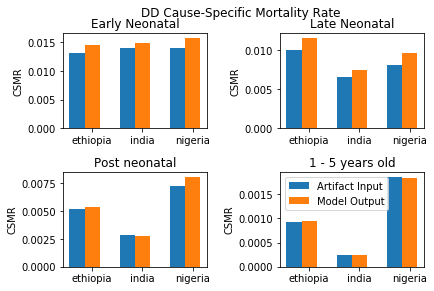

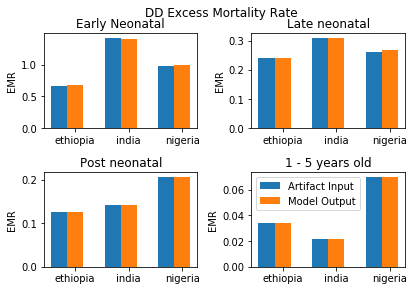

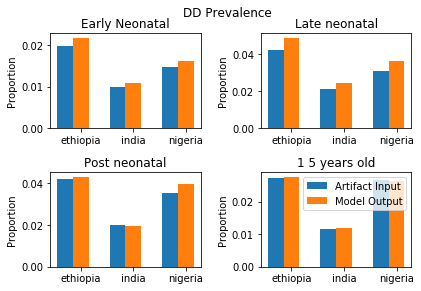

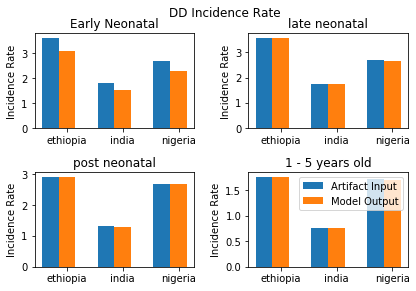

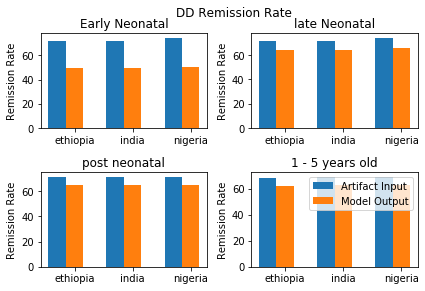

In [43]:
make_and_save_plots('diarrheal_diseases', dd_model, dd_artifact, 'DD', 'dd')

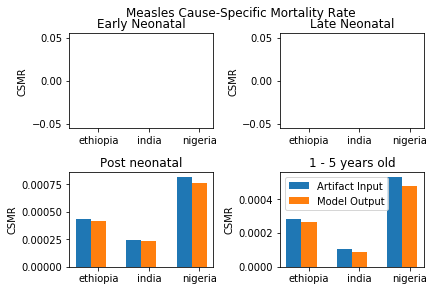

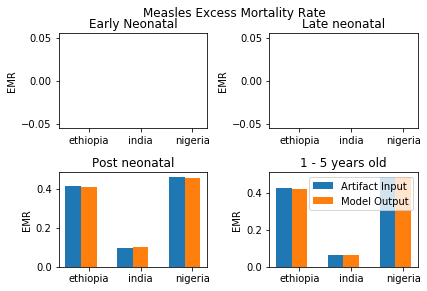

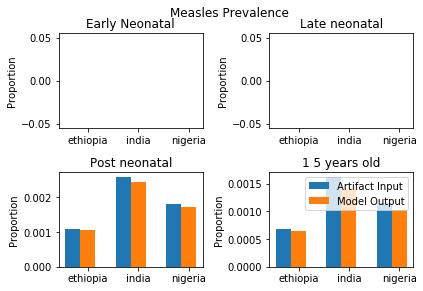

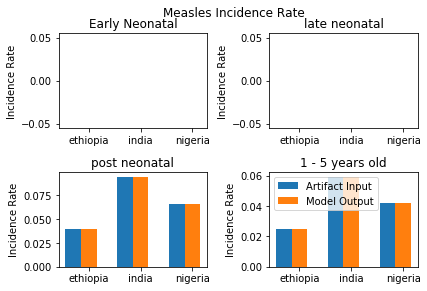

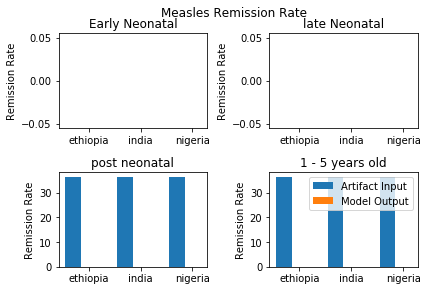

In [44]:
#make_and_save_plots(cause, model_data, artifact_data, title, acronym):

make_and_save_plots('measles', measles_model, measles_artifact, 'Measles', 'Meas')

NOTE: there was something wrong with our measles data transformation in count space. We belief measles valiadate despite the remission graphs being off because the cmsrs and prevalence validates

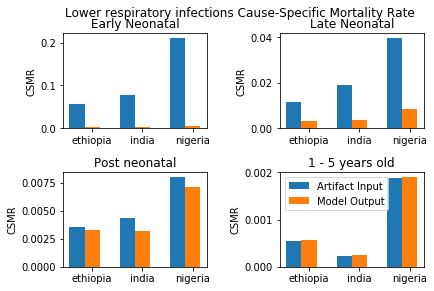

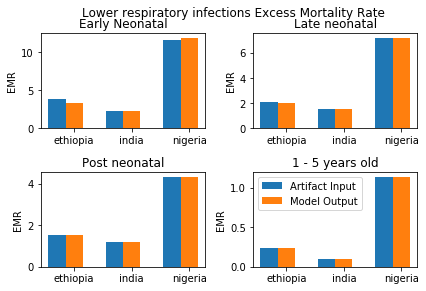

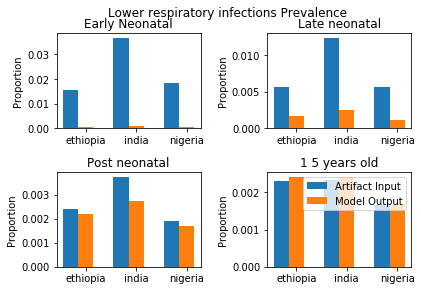

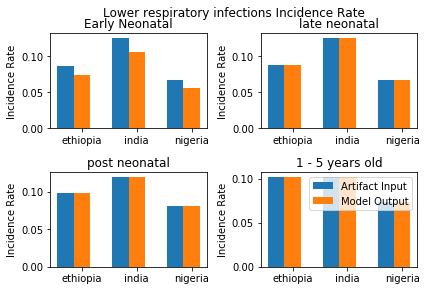

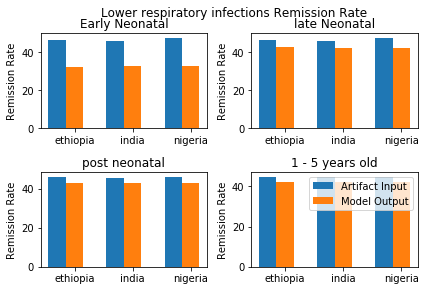

In [45]:
#make_and_save_plots(cause, model_data, artifact_data, title, acronym):

make_and_save_plots('lower_respiratory_infections', lri_model, lri_artifact, 'Lower respiratory infections', 'lri')

Researcher questions for LRI model:

1) CSMR:deaths from LRI/total person time

    a) in the early and late neonatal age groups our model and artifact CSMRs are not comparable. Our model under-estimates the CSMR.

    b) The all-cause mortality rates in the early/late neonatal age groups are comparable, hence we believe this discrepancy is negligible

    c) From GBD compare, we see most neonates who die are from from neonatal causes, hence LRI deaths are a small fraction of neonatal deaths, so the ACMR remains comparable. 
 
2) EMR: deaths from LRI/person time with LRI a) we got this right

3) Prevalence: we initiate the population with the GBD prevalence of the causes, then our model calculates prevalence based on incidence and remission (which is directly pulled from GBD). We use person time with condition/total person time to estimate prevalence in our model after initiation.

     a) we are grossly under-estimating prevalence in the early/late neonatal period. We believe this is because we don't have incidence and remission rates (we pull from GBD) right. 

     b) Supporting our belief that GBD's incidence/remission rates are not accurate, we use GBD incidence and remission to approximate prevalence by using the equation of incidence/remission=prevalence. We can see that its incidence/remission not agree with the prevalence by an order of magnitude. 

     c) GBD probably calculates prevalence separately from their incidence/remission rates and we trust their prevalence more (?). We'd like more clarification on this from GBD modellers 
     
4) Remission: remission rate for LRI is approximately equal for all locations/age groups. Should we trust GBD LRI remission rate data, particularly for the neonatal age groups, as it appears to be driving low LRI prevalence in our model relative to GBD LRI prevalence

Chris answer: 

1) We allow birth prevalence for LRI and this seems to cause a pretty high prevalence in the earliest age groups.  We observe that there is congenital pneumonia, probably arising from infection during birth.
http://ihmeuw.org/52pk

2) Remission is simply a modeled parameter. We have no data to inform that, we just provide a prior 40-50 (The prior of 40-50 is just that we specify for DisMod that the remission should be between those two values- It is based approximately on the mean duration of LRI according to our data (7.8 days; 365 / 8 =~ 45). I wouldn't focus on that I don't think. Besides your remission is relatively close to the GBD ones.


CONCLUSION- we should try to model birth prevalence in subsequent models

In [50]:
def make_and_save_plots_other(cause, model_data, artifact_data, title, acronym):
    
    #CSMR
    barWidth = 0.3
    fig,axs = plt.subplots(2,2)
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == 'early_neonatal').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,0].bar(a, gbd, width=barWidth)
    axs[0,0].bar(b, model, width=barWidth)
    axs[0,0].set_title('Early Neonatal')
    
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == 'late_neonatal').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == 'late_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,1].bar(a, gbd, width=barWidth)
    axs[0,1].bar(b, model, width=barWidth)
    axs[0,1].set_title('Late Neonatal')
    
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == 'post_neonatal').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == 'post_neonatal').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,0].bar(a, gbd, width=barWidth)
    axs[1,0].bar(b, model, width=barWidth)
    axs[1,0].set_title('Post neonatal')
    
    model = model_data['cause_specific_mortality_rate'].where(model_data['age_group'] == '1_to_4').dropna()
    gbd = artifact_data['cause_specific_mortality_rate'].where(artifact_data['age_group'] == '1_to_4').dropna()
    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,1].bar(a, gbd, width=barWidth)
    axs[1,1].bar(b, model, width=barWidth)
    axs[1,1].set_title('1 - 5 years old')
    
    plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
             xticklabels=np.unique(model_data['location']))
    for ax in axs.flat:
        ax.set(ylabel='CSMR')
    plt.legend(['Artifact Input','Model Output'])
    plt.suptitle(f'{title} Cause-Specific Mortality Rate',x=0.55, y=1)
    plt.subplots_adjust(right=1.7, top=1.5)
    plt.tight_layout()

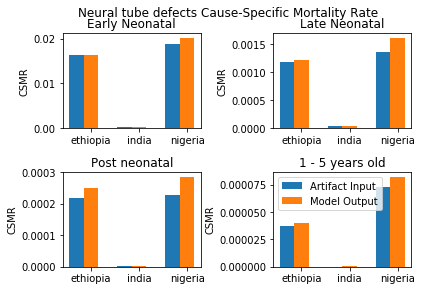

In [51]:
make_and_save_plots_other('neural_tube_defects', ntd_model, ntd_artifact, 'Neural tube defects', 'ntd')